In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
area = meshmask.e1t[0] * meshmask.e2t[0]

# ensure tmask has same dimensions as field
tmask = tmask.rename({'z' : 'deptht'})

In [3]:
# make land versions of cmaps, land is grey
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_delta = copy.copy(cm.delta)
cm_delta.set_bad('grey')

In [4]:
data5 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/01jan18/SalishSea_1h_20180101_20180105_biol_T.nc')
combined_data_diatoms = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_biol_T.nc', 
                                  data_vars = ['diatoms'])
combined_data_nitrate = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_biol_T.nc', 
                                  data_vars = ['nitrate'])
combined_data_silicon = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_biol_T.nc', 
                                  data_vars = ['silicon'])
combined_data_ammonium = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_biol_T.nc', 
                                  data_vars = ['ammonium'])


In [6]:
def planview(base, new, field, it, ide, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].set_title(f'Base {field}')

    new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]-
     base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]).where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]
     ).plot(ax=axs[2], cmap=cm_bwr, 
                                                              vmax=dvmax, vmin=-dvmax)
    axs[2].set_title(f'Difference (New-Base) {field}')

    for ax in axs:
        viz_tools.set_aspect(ax)

    fig.suptitle(f'Depth {base.deptht[ide].values:.0f} m')

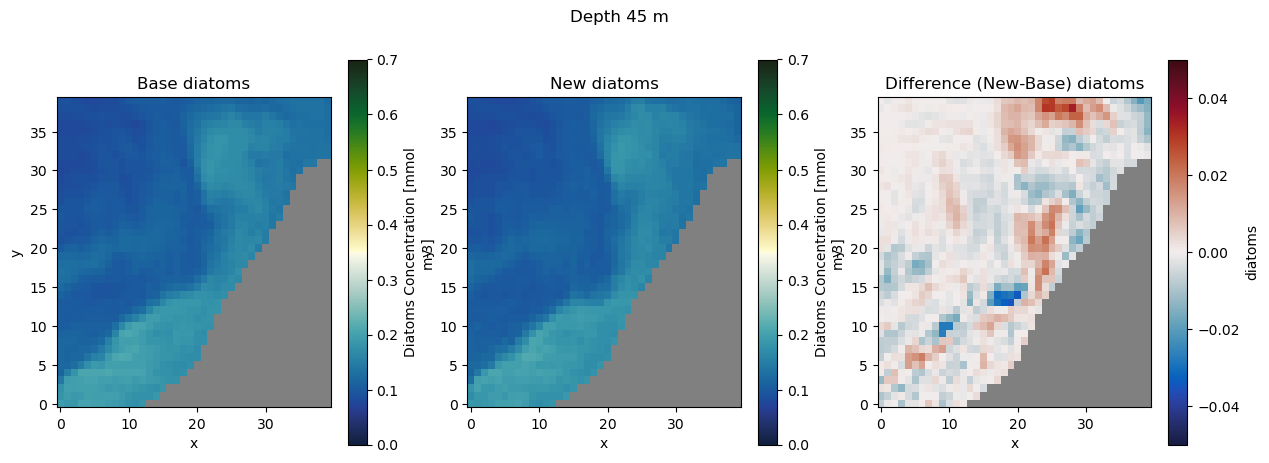

In [7]:
planview(combined_data_diatoms, data5, 'diatoms', 119, 23 , cm_delta, 0.7, 0, 0.05)

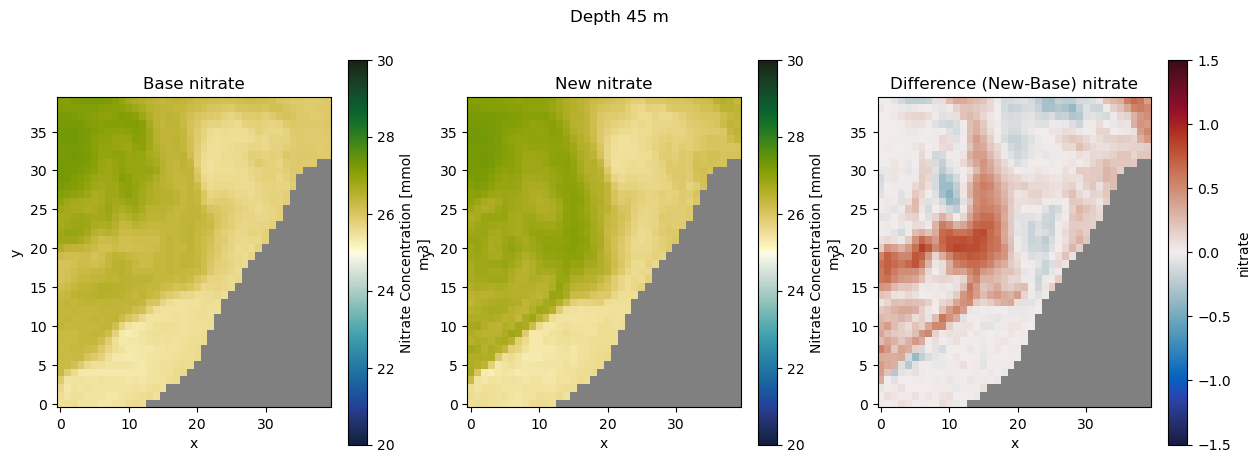

In [19]:
planview(combined_data_nitrate, data5, 'nitrate', 119, 23 , cm_delta, 30, 20, 1.5)

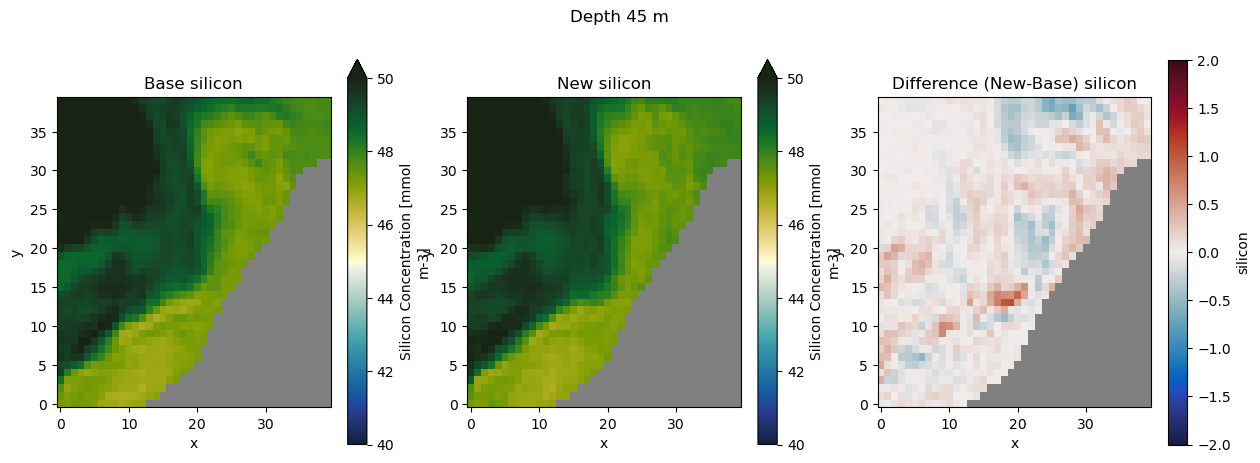

In [20]:
planview(combined_data_silicon, data5, 'silicon', 119, 23 , cm_delta, 50, 40, 2)

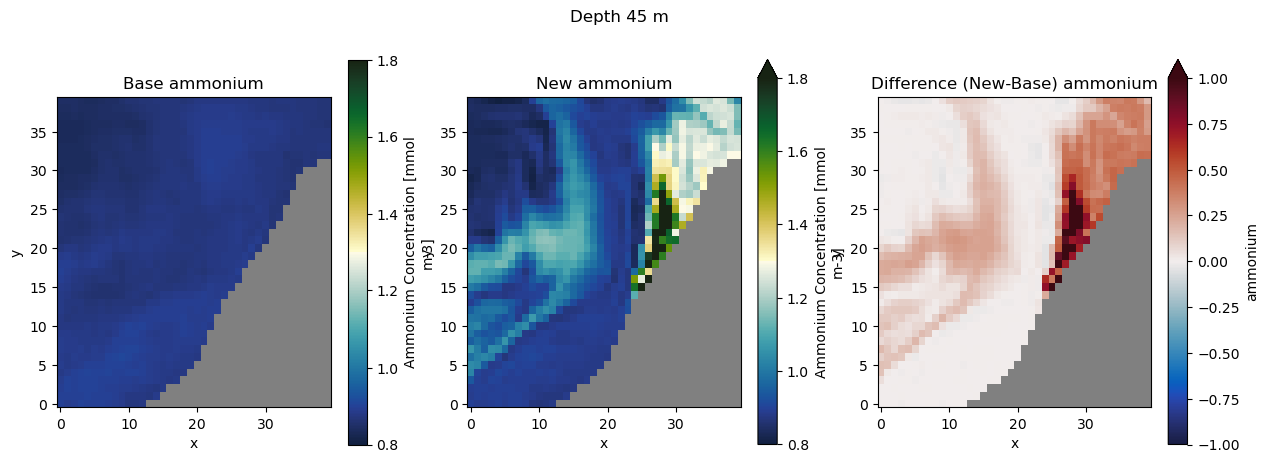

In [25]:
planview(combined_data_ammonium, data5, 'ammonium', 119, 23 , cm_delta, 1.8, 0.8, 1)

In [19]:
def verticalview(base, new, field, it, dep, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, :, dep, 250+iz:350-iz].where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[0].set_title(f'Base {field}')

    new[field][it, :, dep, 250+iz:350-iz].where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, :, dep, 250+iz:350-iz]-
     base[field][it, :, dep, 250+iz:350-iz]).where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[2], cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs[2].set_title(f'Difference (New-Base) {field}')


    fig.suptitle(f'Vertical view at y = {dep}')

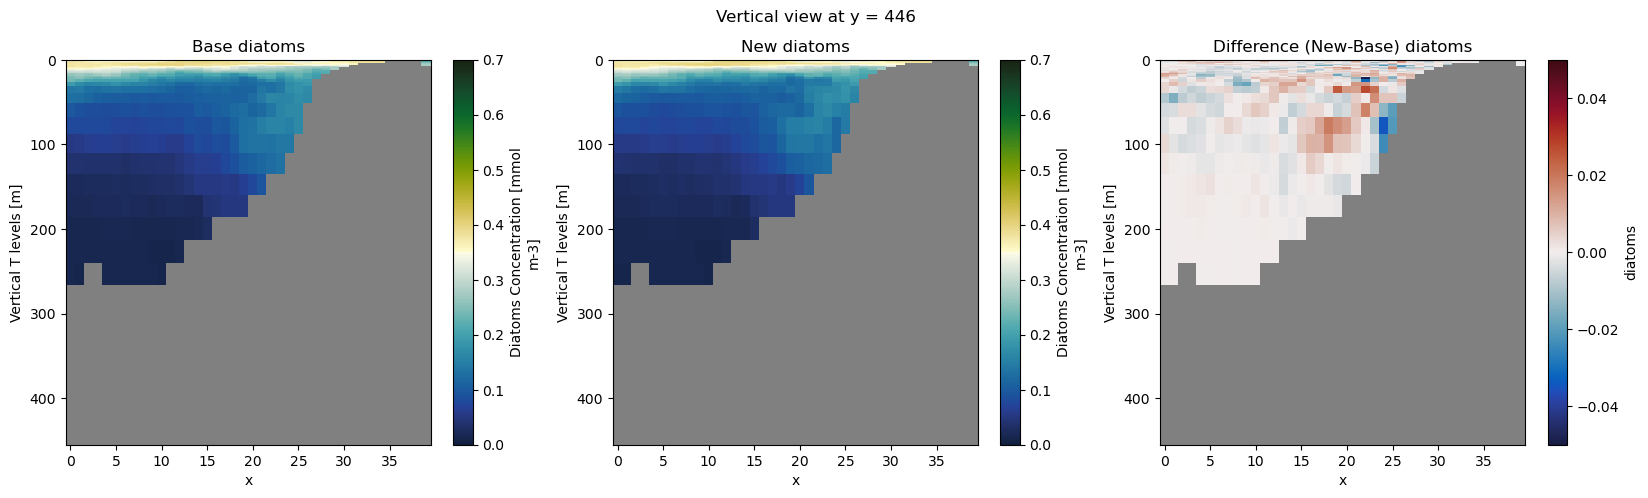

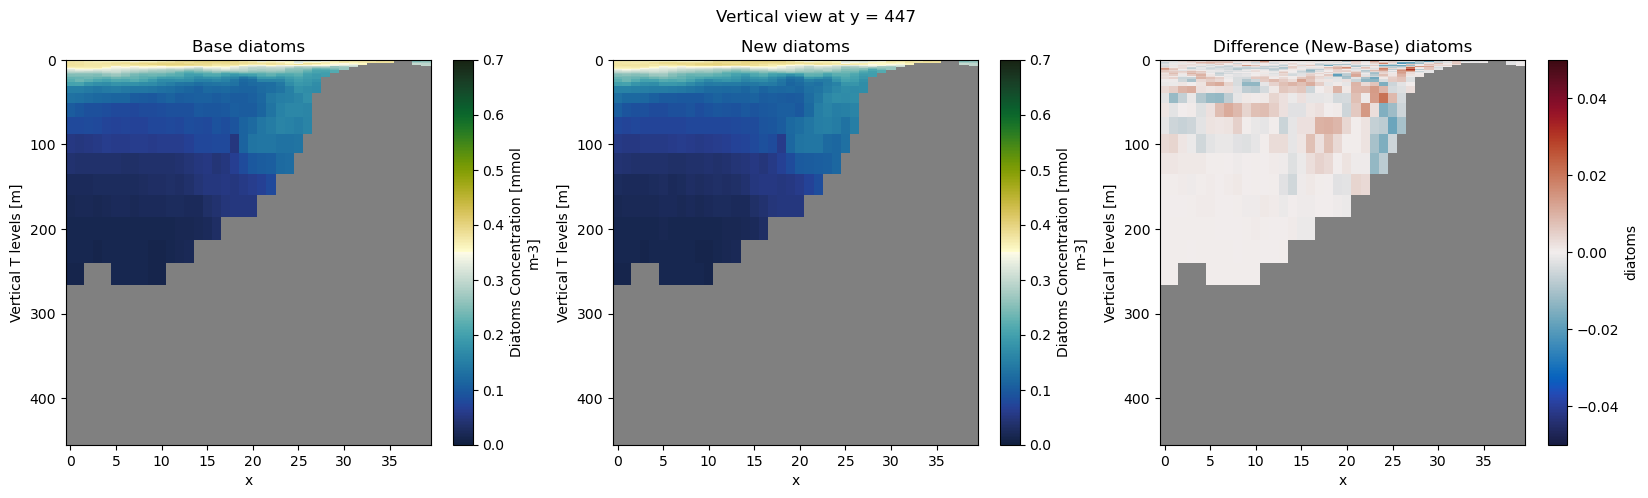

In [20]:
verticalview(combined_data_diatoms, data5, 'diatoms', 119, 446, cm_delta, 0.7, 0, 0.05)
verticalview(combined_data_diatoms, data5, 'diatoms', 119, 447, cm_delta, 0.7, 0, 0.05)

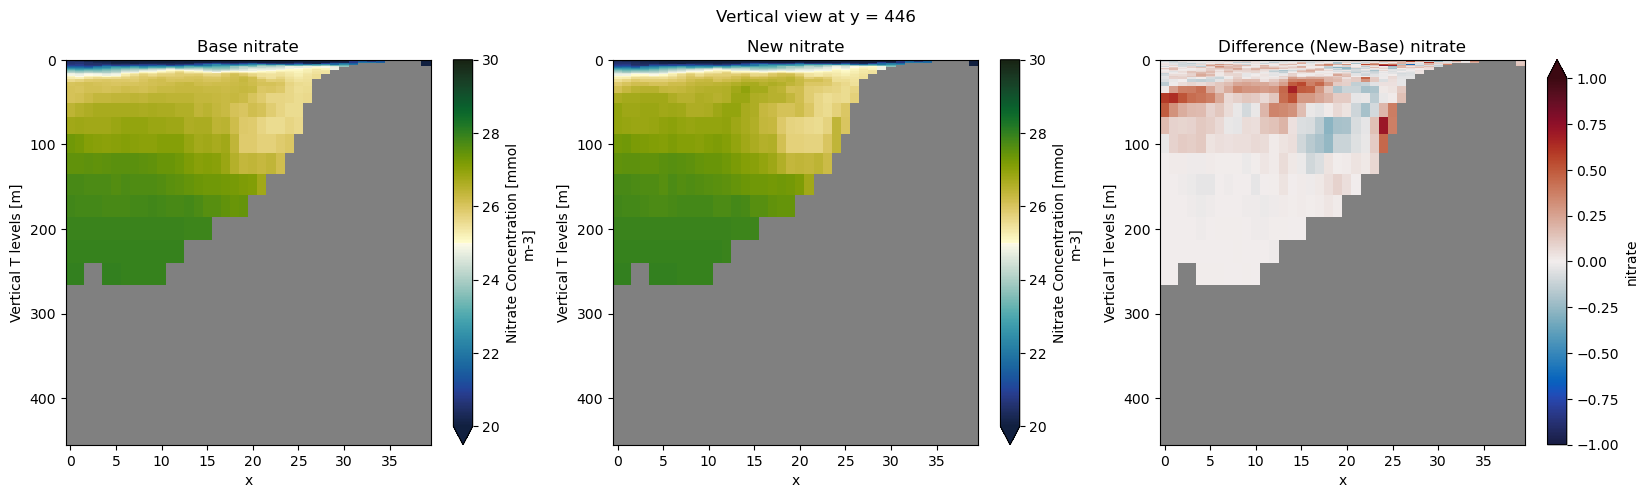

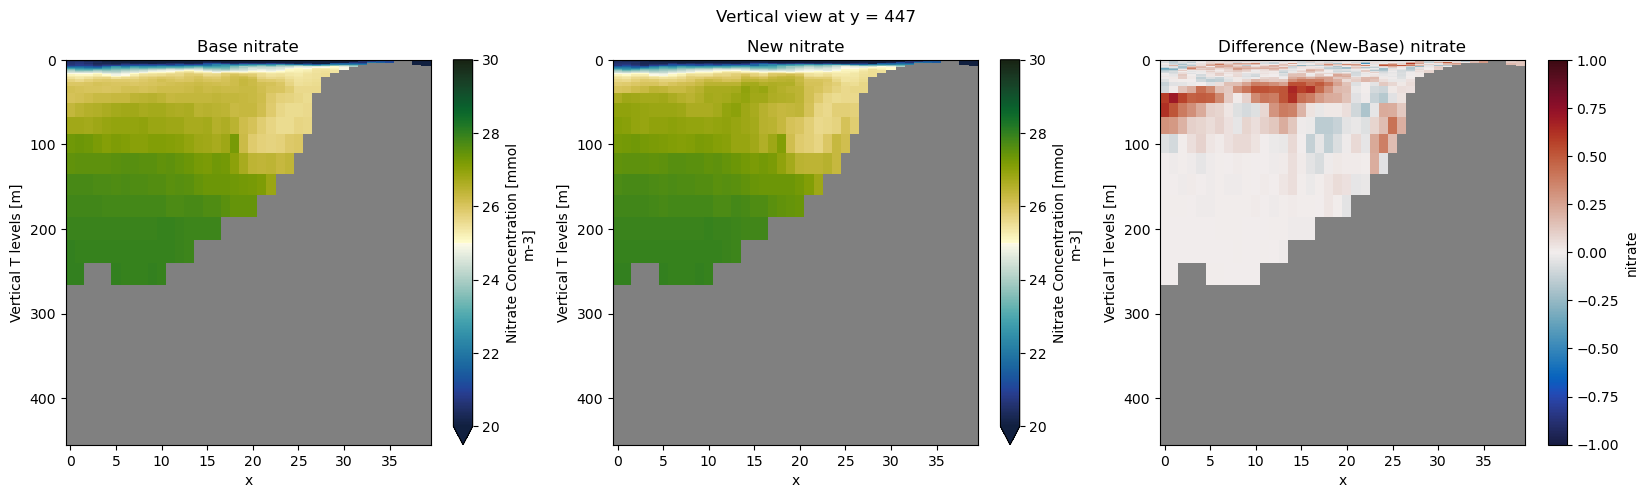

In [16]:
verticalview(combined_data_nitrate, data5, 'nitrate', 119, 446, cm_delta, 30, 20, 1)
verticalview(combined_data_nitrate, data5, 'nitrate', 119, 447, cm_delta, 30, 20, 1)

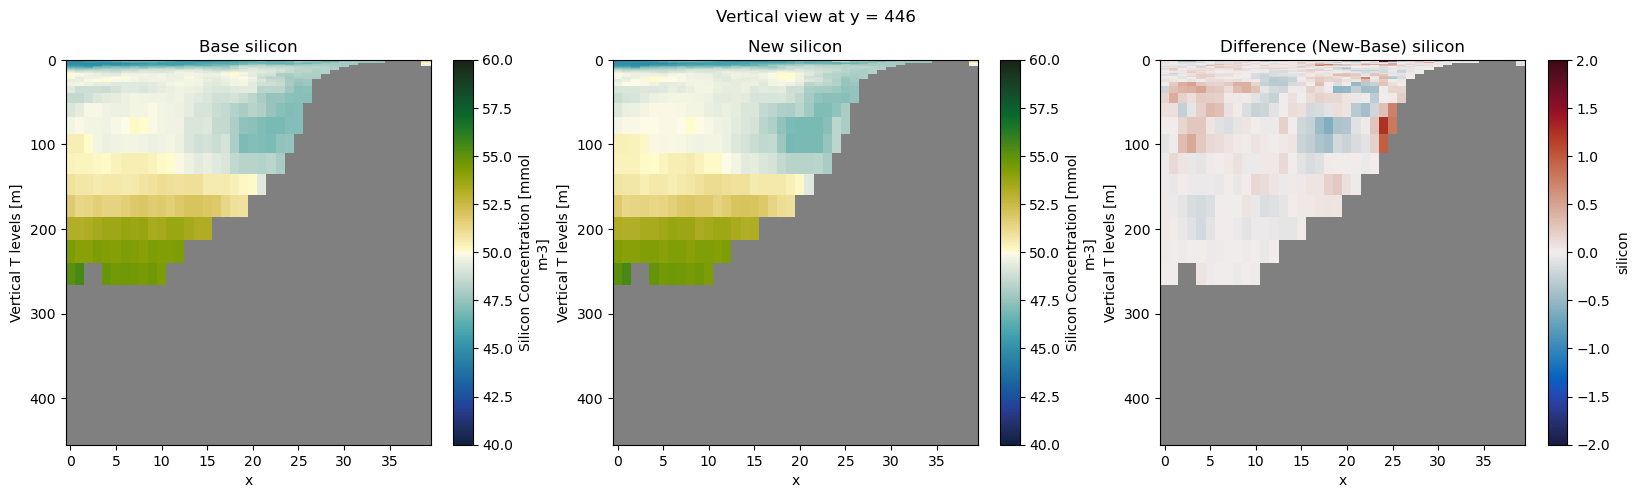

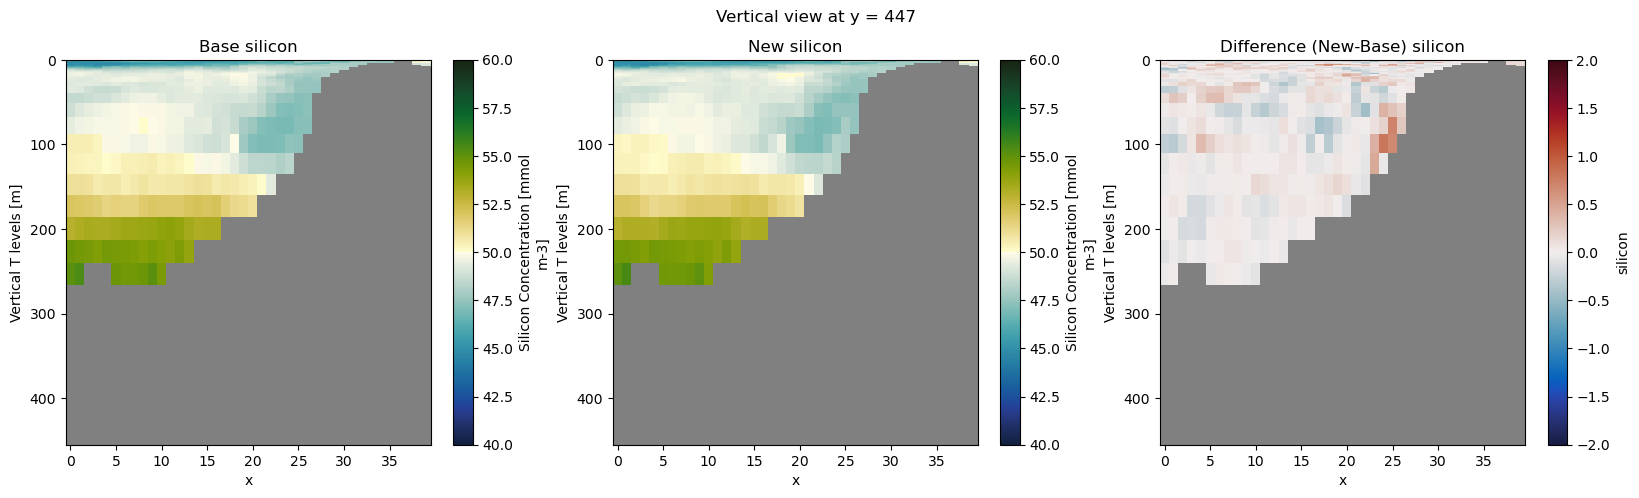

In [15]:
verticalview(combined_data_silicon, data5, 'silicon', 119, 446, cm_delta, 60, 40, 2)
verticalview(combined_data_silicon, data5, 'silicon', 119, 447, cm_delta, 60, 40, 2)

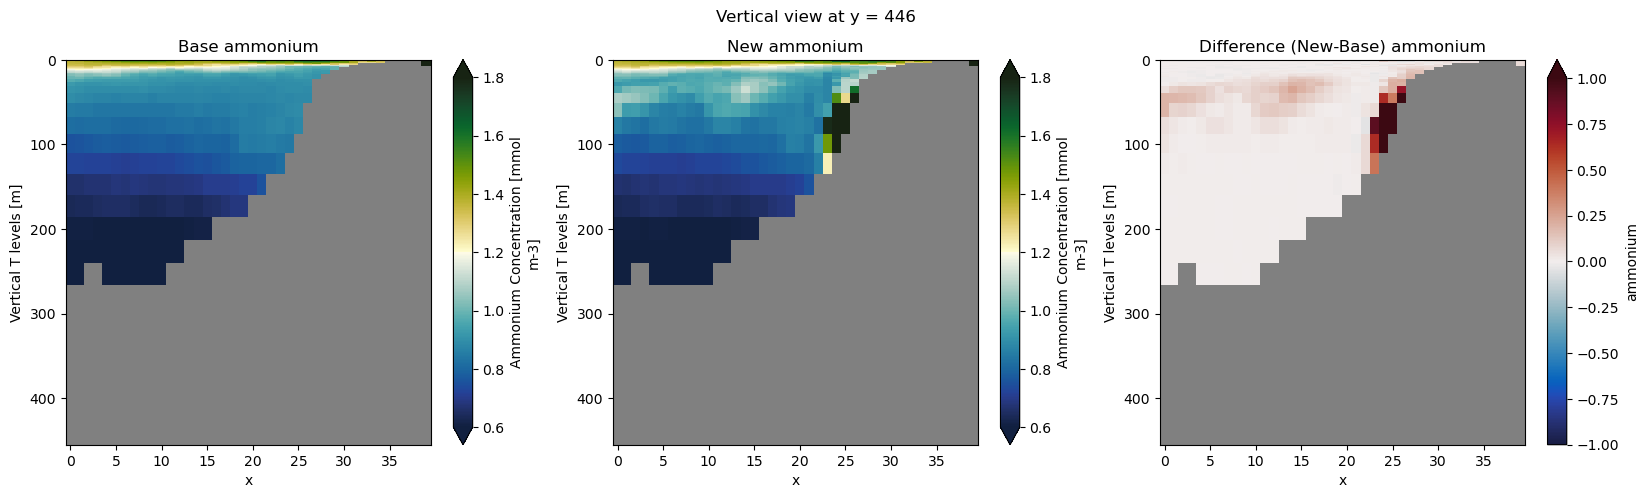

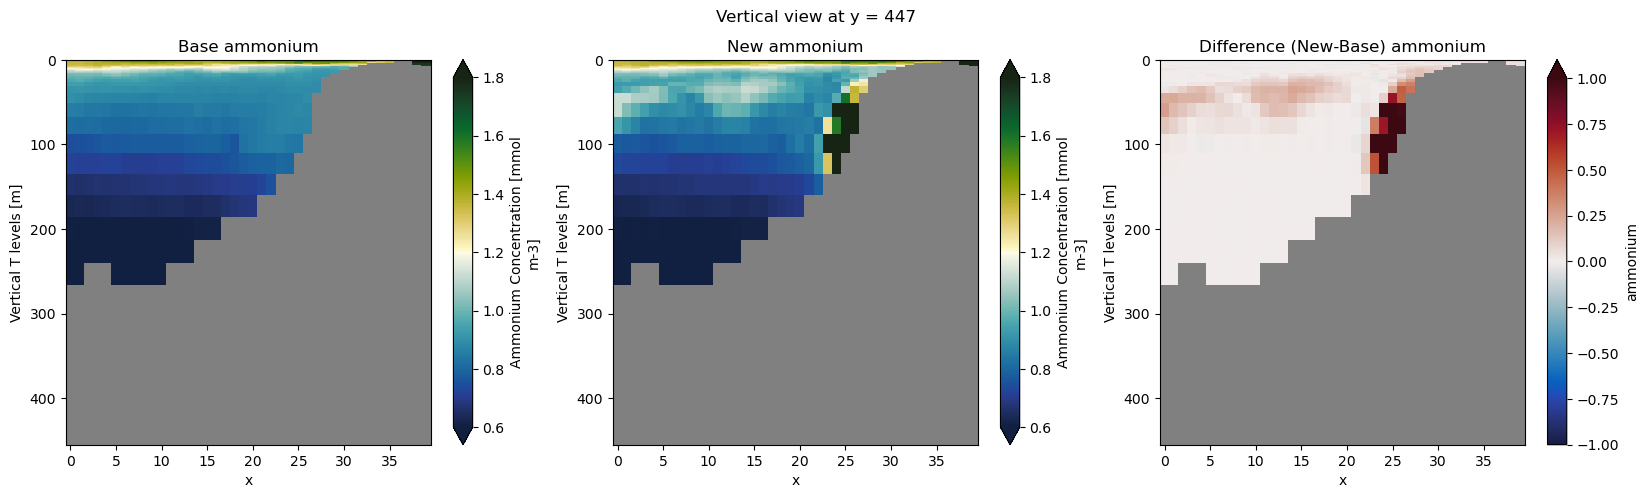

In [21]:
verticalview(combined_data_ammonium, data5, 'ammonium', 119, 446 , cm_delta, 1.8, 0.6, 1)
verticalview(combined_data_ammonium, data5, 'ammonium', 119, 447 , cm_delta, 1.8, 0.6, 1)

In [26]:
def vertical_view_x(base, new, field, it, dep,  cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, :, 400+iz:500-iz, dep].where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[0].set_title(f'Base {field}')

    new[field][it, :, 400+iz:500-iz, dep].where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, :, 400+iz:500-iz, dep]-
     base[field][it, :, 400+iz:500-iz, dep]).where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[2], cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs[2].set_title(f'Difference (New-Base) {field}')

    fig.suptitle(f'Vertical view at x = {dep}')

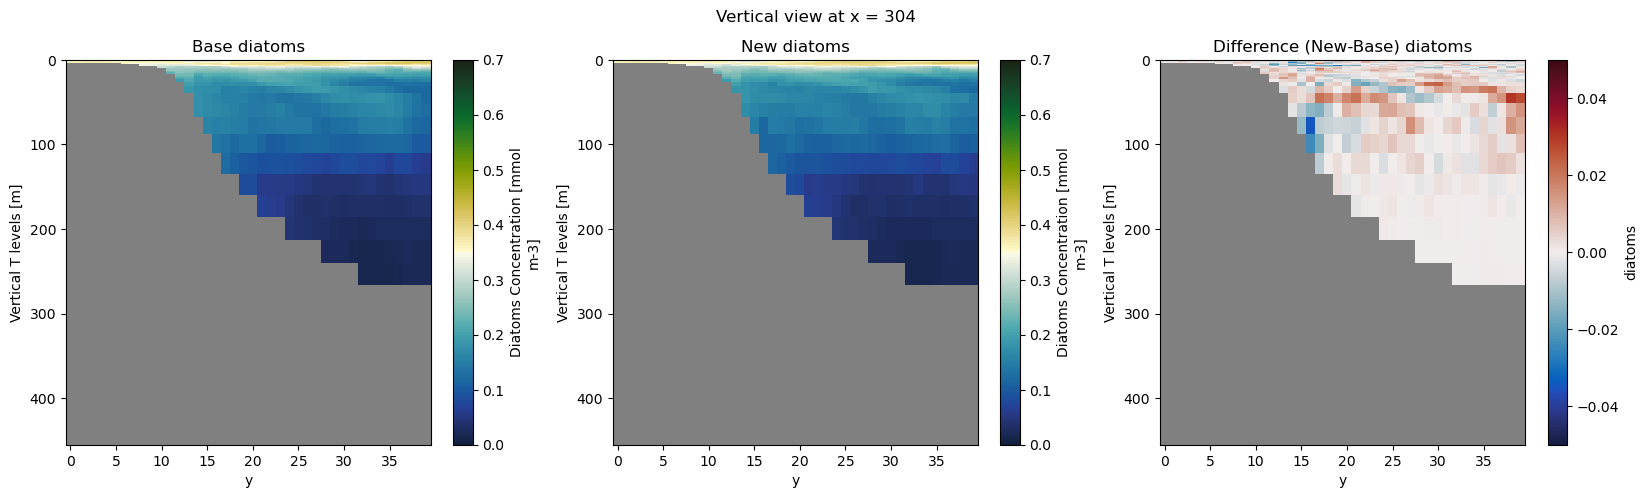

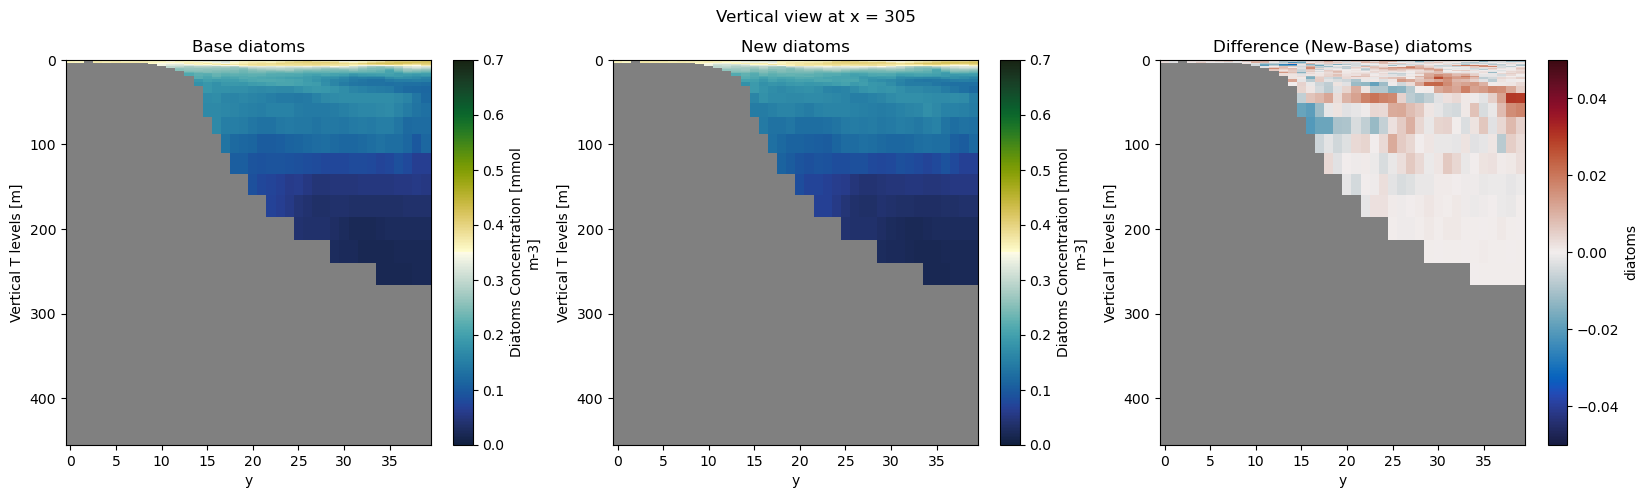

In [23]:
vertical_view_x(combined_data_diatoms, data5, 'diatoms', 119, 304, cm_delta, 0.7, 0, 0.05)
vertical_view_x(combined_data_diatoms, data5, 'diatoms', 119, 305, cm_delta, 0.7, 0, 0.05)

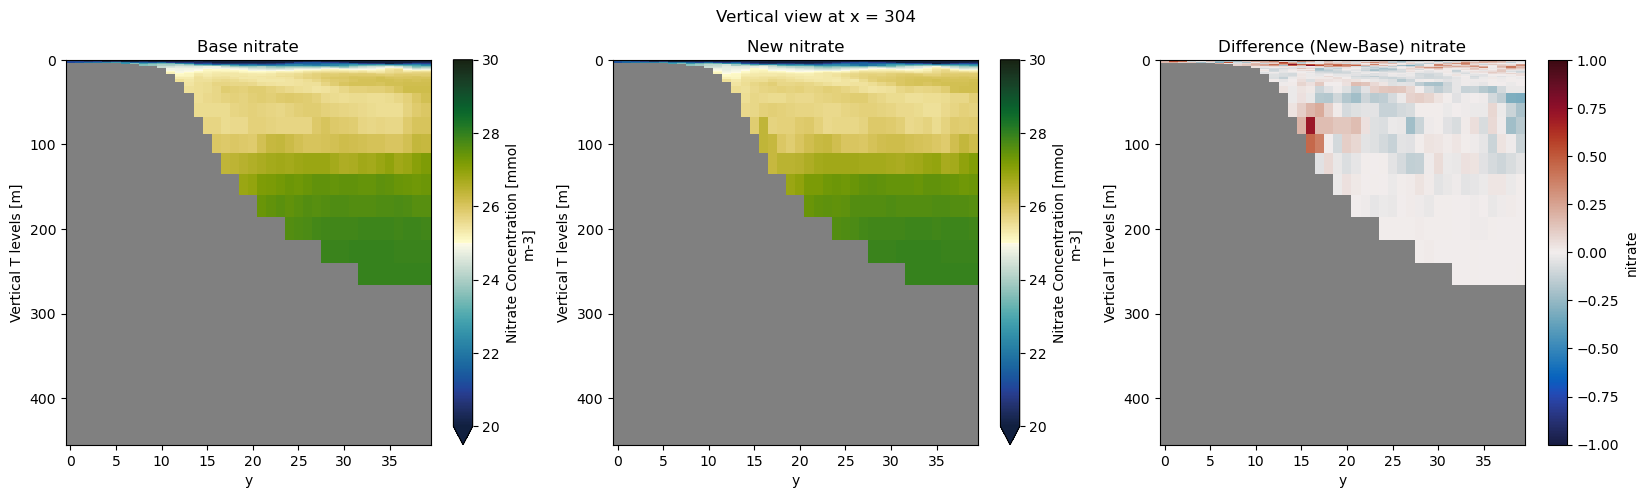

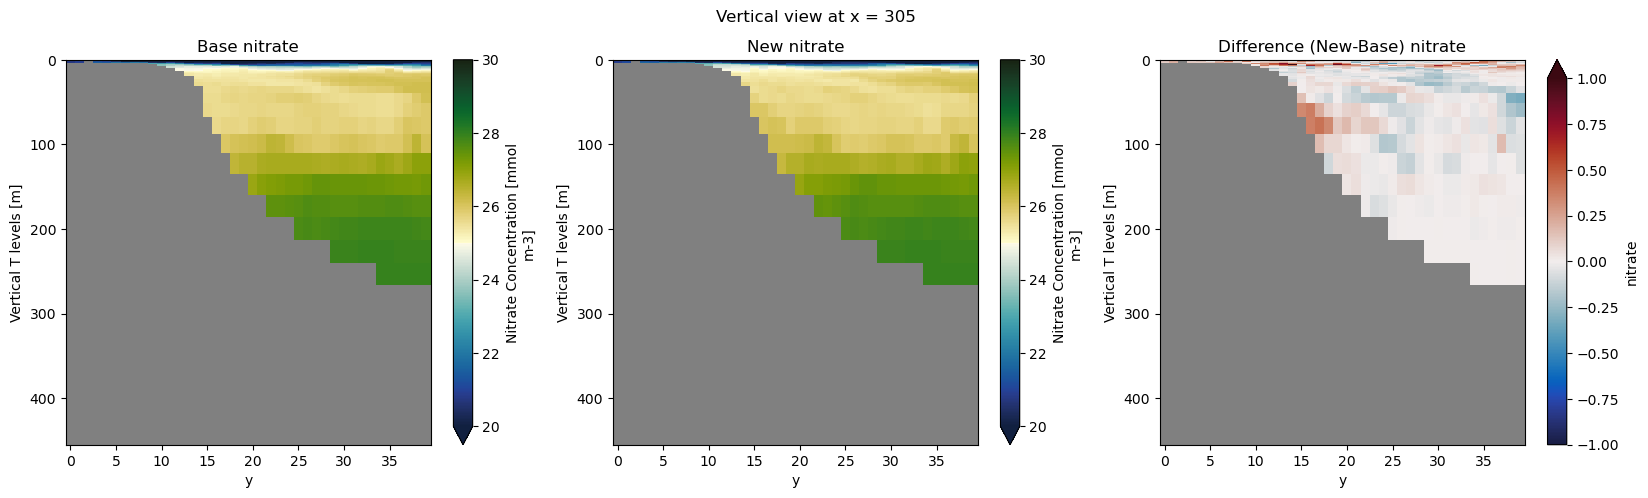

In [25]:
vertical_view_x(combined_data_nitrate, data5, 'nitrate', 119, 304, cm_delta, 30, 20, 1)
vertical_view_x(combined_data_nitrate, data5, 'nitrate', 119, 305, cm_delta, 30, 20, 1)

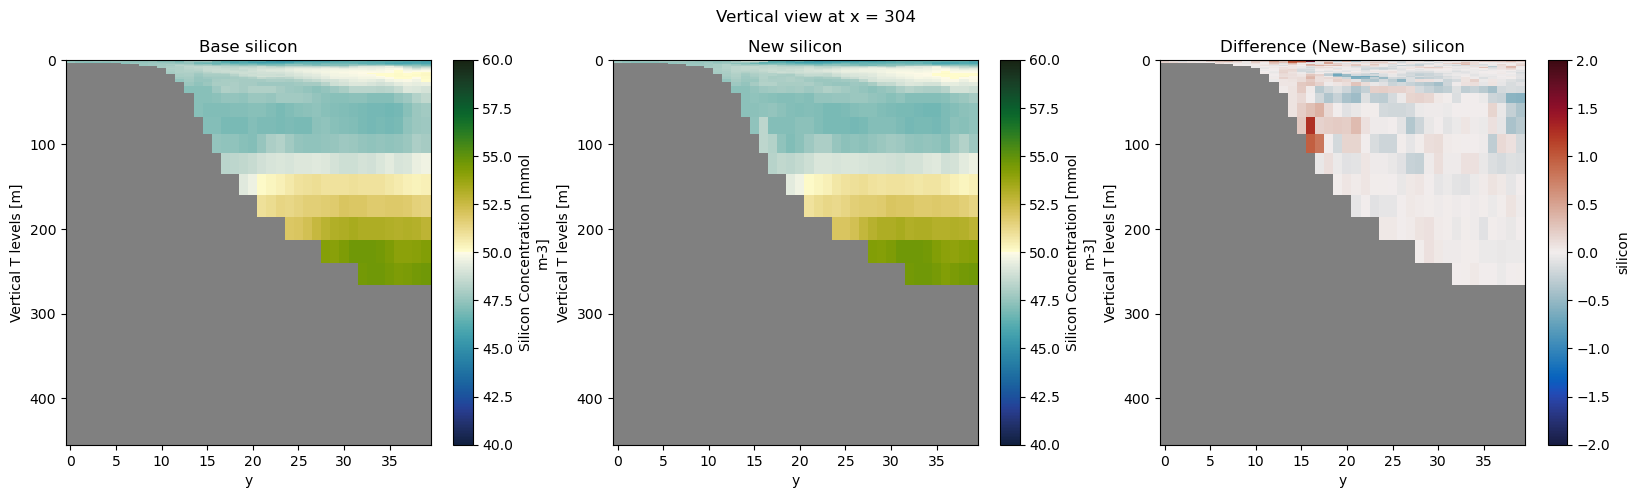

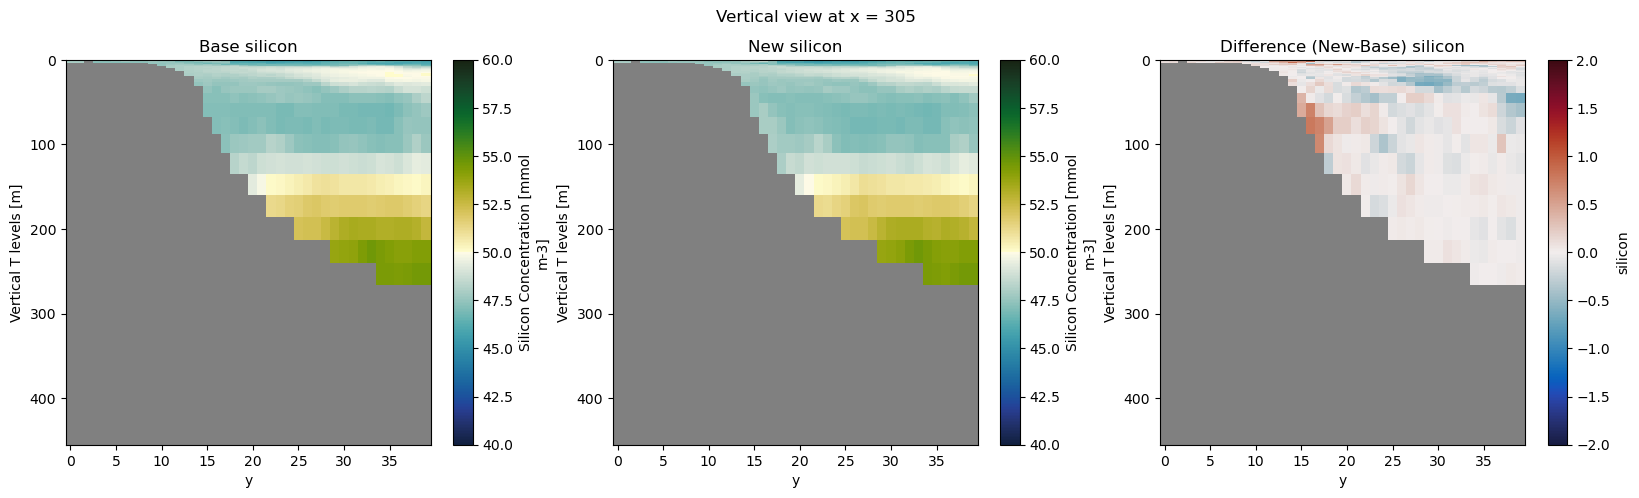

In [24]:
vertical_view_x(combined_data_silicon, data5, 'silicon', 119, 304, cm_delta, 60, 40, 2)
vertical_view_x(combined_data_silicon, data5, 'silicon', 119, 305, cm_delta, 60, 40, 2)

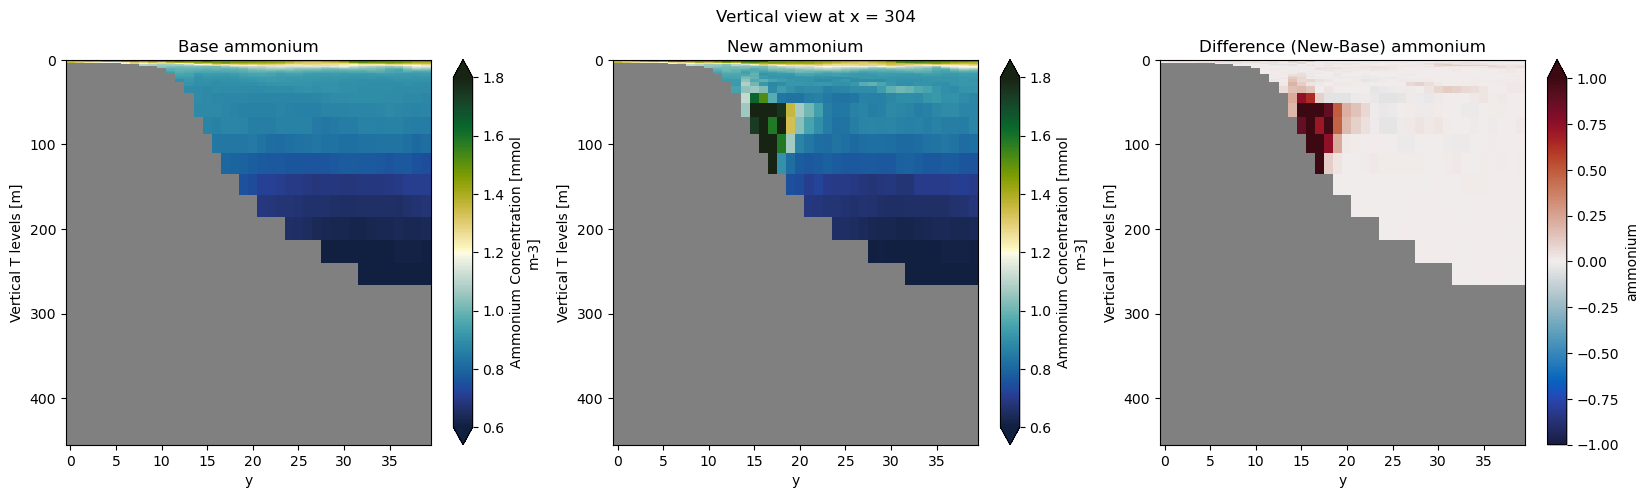

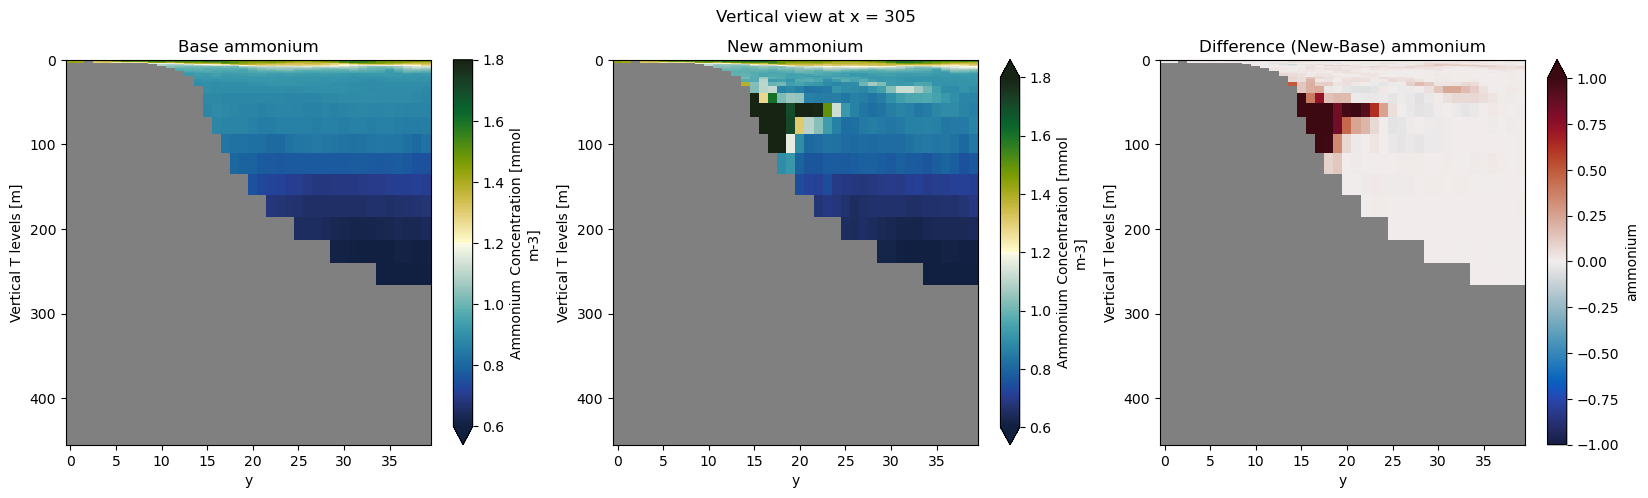

In [27]:
vertical_view_x(combined_data_ammonium, data5, 'ammonium', 119, 304 , cm_delta, 1.8, 0.6, 1)
vertical_view_x(combined_data_ammonium, data5, 'ammonium', 119, 305 , cm_delta, 1.8, 0.6, 1)

In [28]:
def plotSumDiffTime(base, new, field, vmin, vmax, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    diff = new[field]- base[field]
    sum_diff = diff.sum(dim = ["y", "x"])
    sum_diff.plot(ax=axs, y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    axs.set_title(f'Time Series for Sum of difference for {field}')

In [5]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)
depth = slice(0,26)

data5_slice = data5.isel(y = y_slice, x = x_slice)
combined_data_diatoms_slice = combined_data_diatoms.isel(y = y_slice, x = x_slice)
combined_data_nitrate_slice = combined_data_nitrate.isel(y = y_slice, x = x_slice)
combined_data_silicon_slice = combined_data_silicon.isel(y = y_slice, x = x_slice)
combined_data_ammonium_slice = combined_data_ammonium.isel(y = y_slice, x = x_slice)

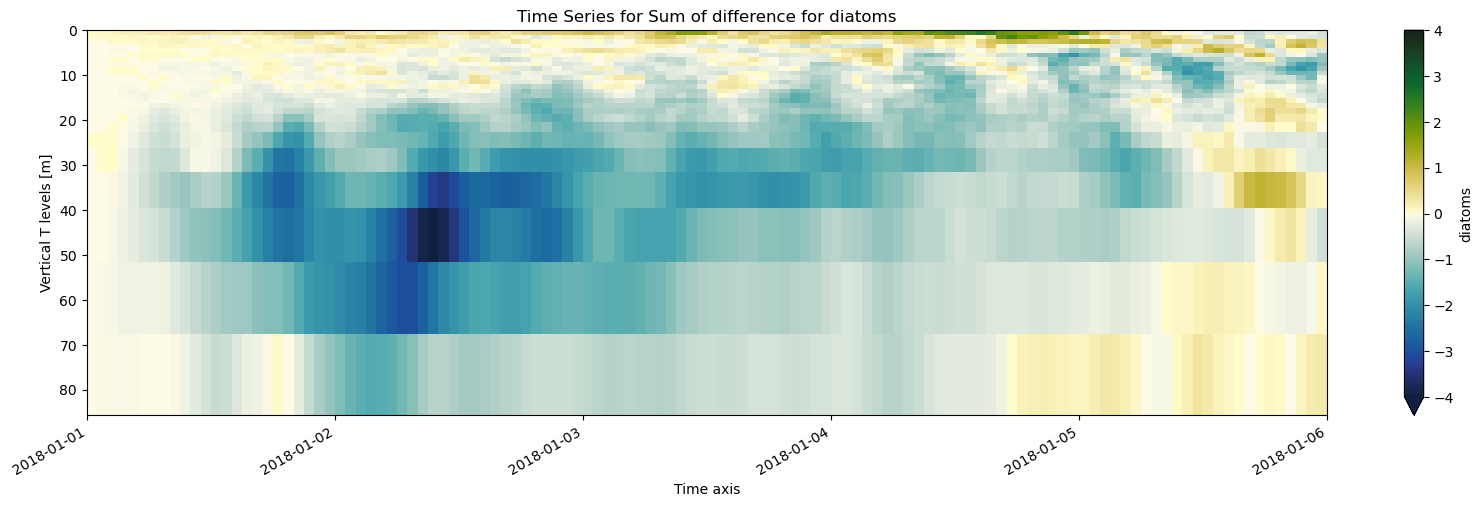

In [28]:
plotSumDiffTime(combined_data_diatoms_slice, data5_slice, 'diatoms', -4, 4, cm_delta)

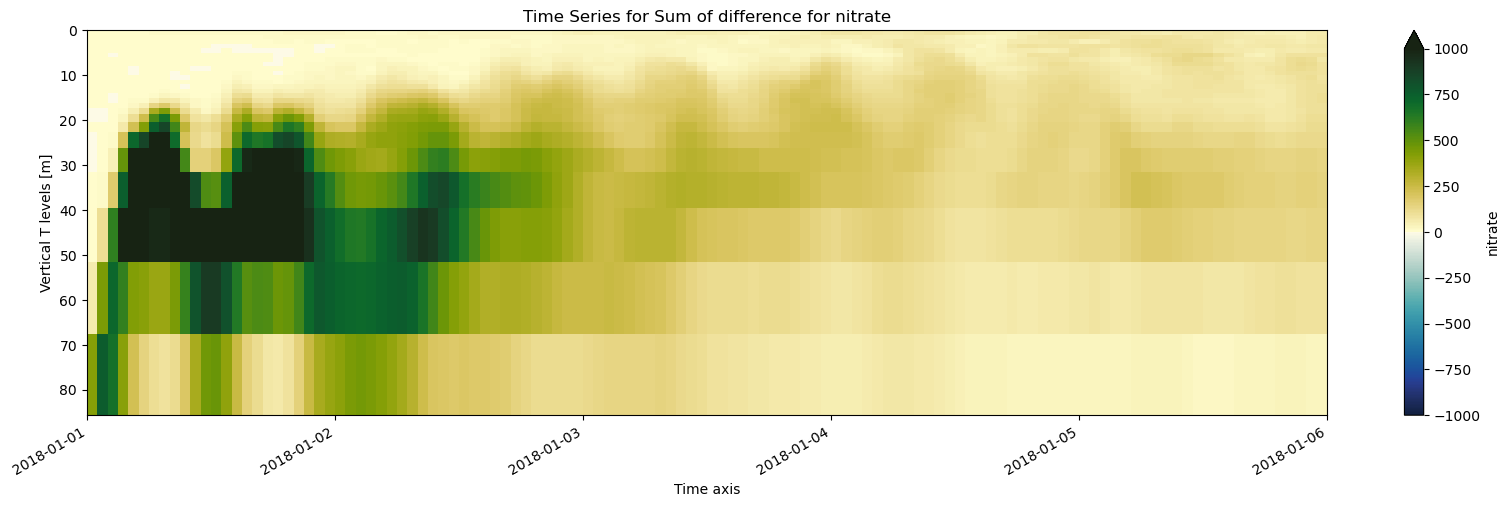

In [27]:
plotSumDiffTime(combined_data_nitrate_slice, data5_slice, 'nitrate', -1000, 1000, cm_delta)

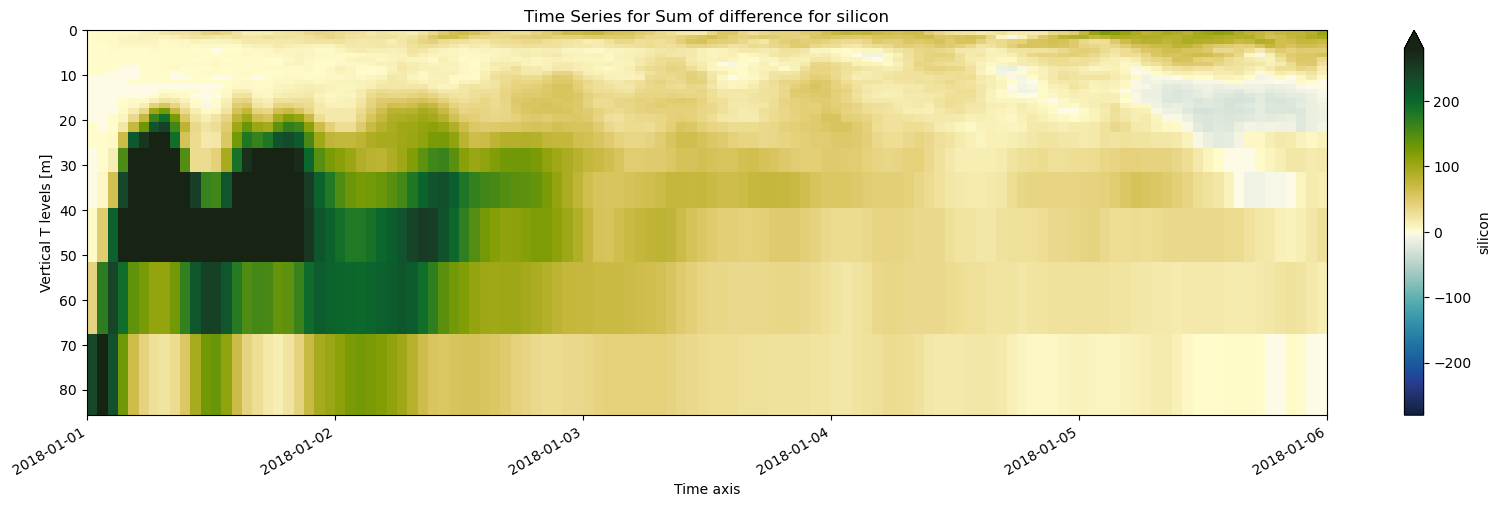

In [37]:
plotSumDiffTime(combined_data_silicon_slice, data5_slice, 'silicon', -280, 280, cm_delta)

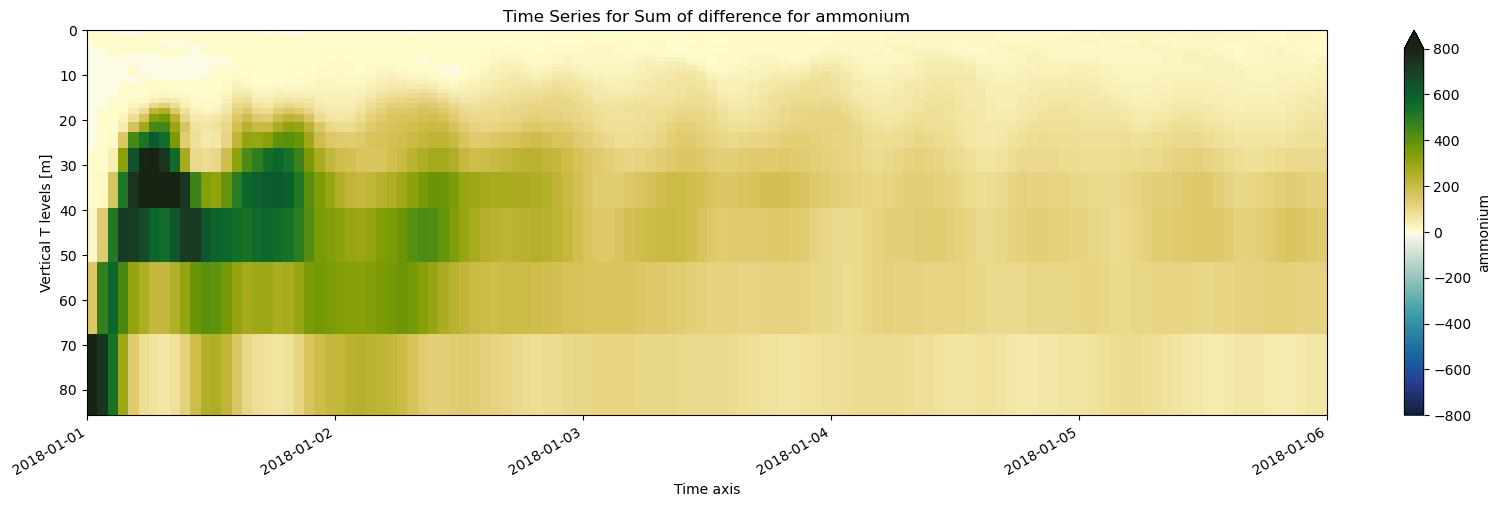

In [32]:
plotSumDiffTime(combined_data_ammonium_slice, data5_slice, 'ammonium', -800, 800, cm_delta)

In [7]:
def plotAvgDiffTime(base, new, field, vmin, vmax, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    diff = new[field]- base[field]
    diff_avg = (diff * area.isel(y = y_slice, x = x_slice)).where(tmask.isel(y = y_slice, x = x_slice)).mean(axis = 2).mean(axis = 2) / area.isel(y = y_slice, x = x_slice).where(tmask.isel(y = y_slice, x = x_slice)).mean()
    diff_avg.plot(ax=axs, y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    axs.set_title(f'Time Series for average difference in {field}')

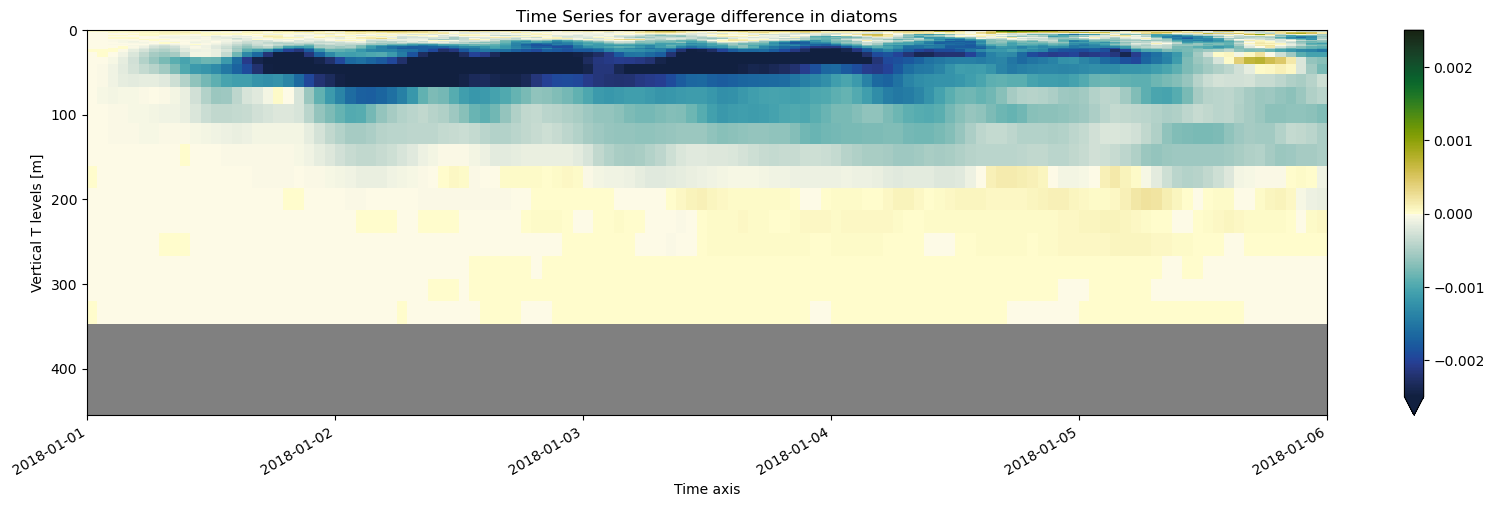

In [8]:
plotAvgDiffTime(combined_data_diatoms_slice, data5_slice, 'diatoms', -0.0025, 0.0025, cm_delta)

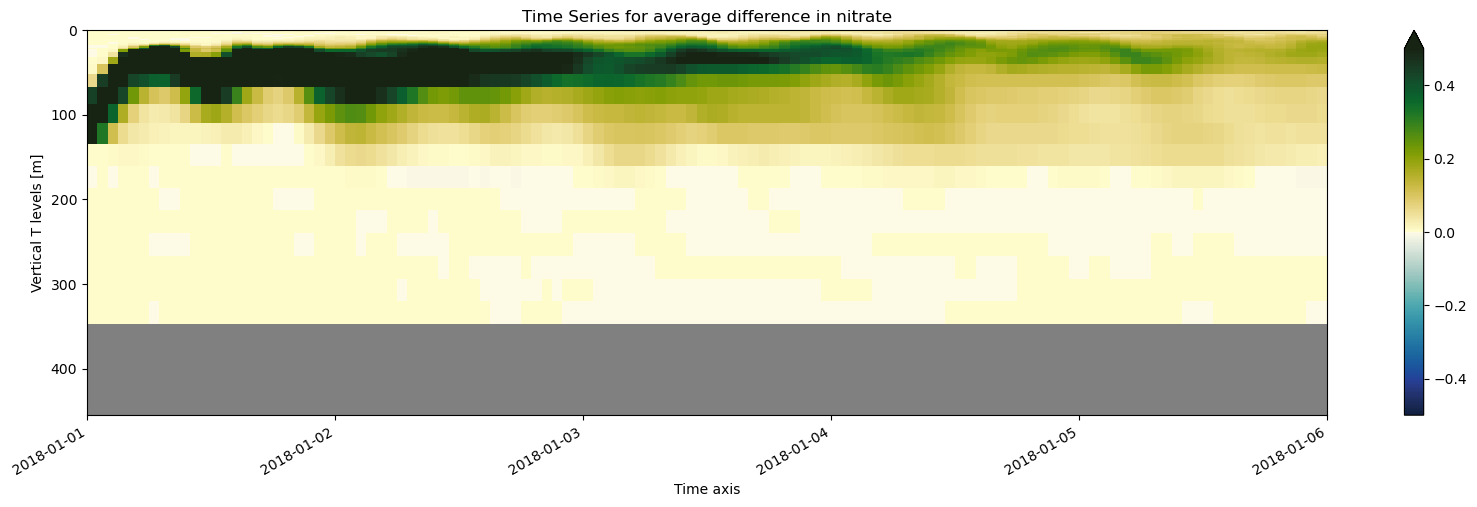

In [9]:
plotAvgDiffTime(combined_data_nitrate_slice, data5_slice, 'nitrate', -0.5, 0.5, cm_delta)

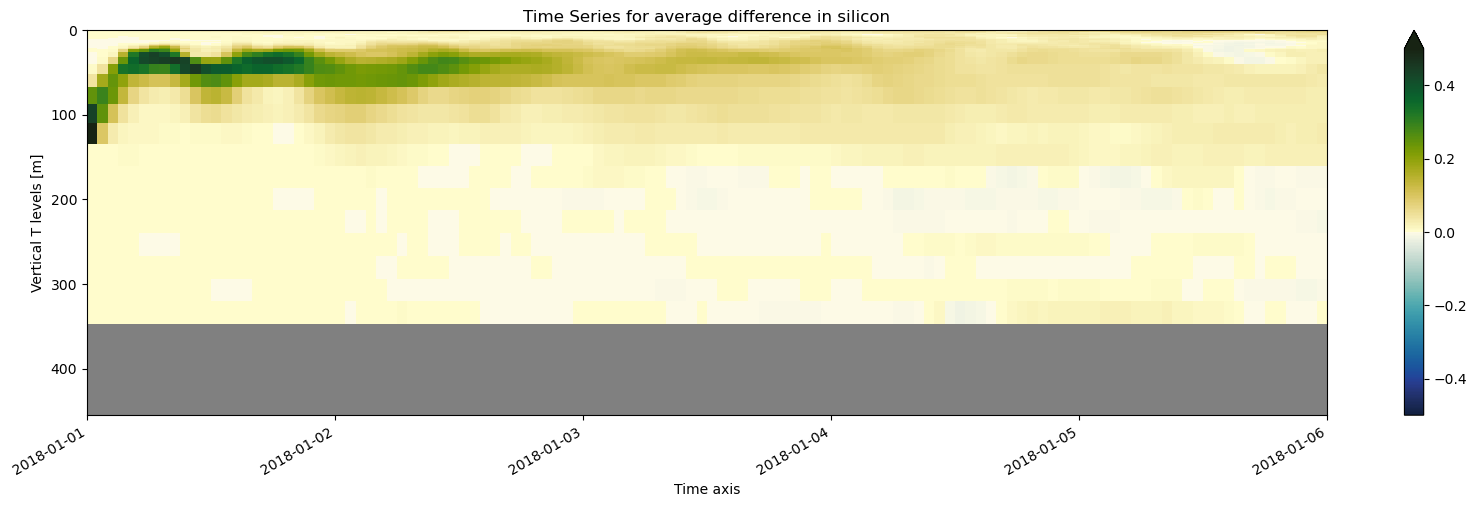

In [10]:
plotAvgDiffTime(combined_data_silicon_slice, data5_slice, 'silicon', -0.5, 0.5, cm_delta)

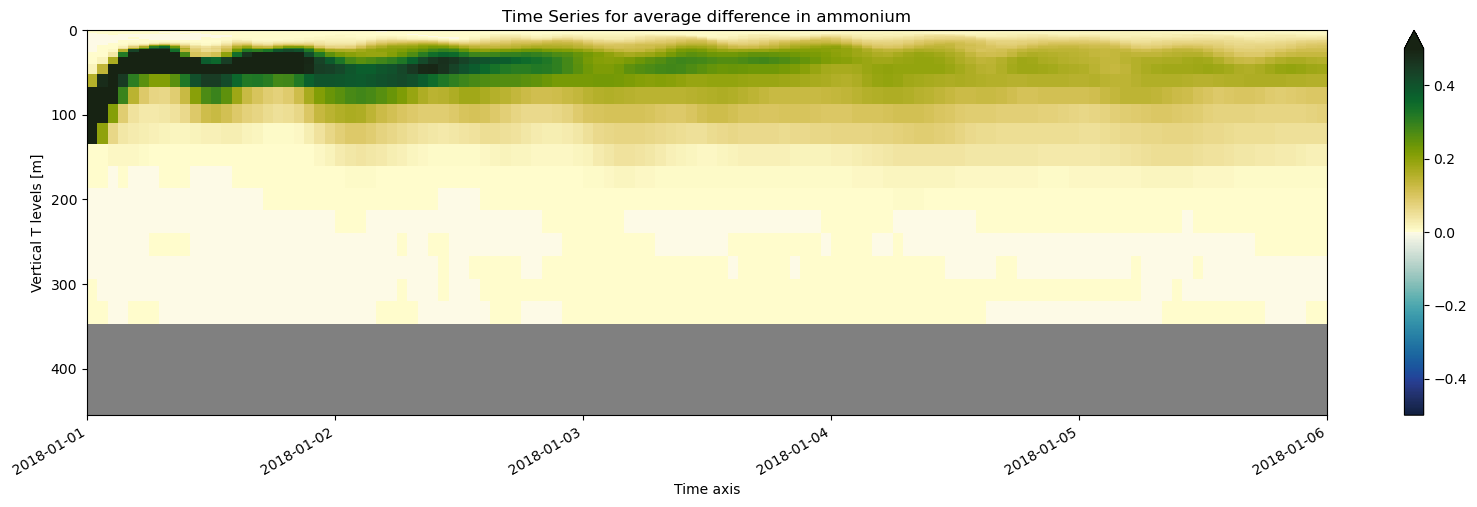

In [11]:
plotAvgDiffTime(combined_data_ammonium_slice, data5_slice, 'ammonium', -0.5, 0.5, cm_delta)